# Setup

In [2]:
# Import python packages
import xarray as xr #to read file, alter file
import matplotlib as mpl # plotting
import matplotlib.pyplot as plt # plotting

import numpy as np # only needed to run example plots

# Cartopy imports
import cartopy.crs as ccrs # map projections
import cartopy.feature as cfeature # features (eg. borders, lakes)
from cartopy.util import add_cyclic_point # useful for contourf plots
import cartopy.mpl.ticker as cticker # formatting ticks to be lat/lon

from matplotlib.animation import FuncAnimation #animations

IMPORTANT: if there is a download/SSL error when using cartopy features, go to https://www.naturalearthdata.com/downloads/ or urls specified in error and download required files. Extract all files in user/.local/share/cartopy/shapefiles/natural_earth/ and then physical or cultural depending on the feature.

In [3]:
# Specify path and file name
path = "H:/Summer24-25/" # make sure path uses slashes in //// direction (not '\\\')
filename = "trends_mad_2005_2015.h0.2014-09.nc"
file = path + filename
print(file) #check it looks correct

H:/Summer24-25/trends_mad_2005_2015.h0.2014-09.nc


In [4]:
ds = xr.open_dataset(file) # Read in file as dataset
ds # and get summary

<xarray.Dataset> Size: 312MB
Dimensions:       (time: 1, lev: 88, lat: 192, lon: 288, ilev: 89, nbnd: 2,
                   zlon: 1)
Coordinates:
  * ilev          (ilev) float64 712B 4.5e-06 7.42e-06 1.223e-05 ... 985.0 1e+03
  * lat           (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lev           (lev) float64 704B 5.96e-06 9.827e-06 1.62e-05 ... 977.5 992.5
  * lon           (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * time          (time) datetime64[ns] 8B 2014-10-01
  * zlon          (zlon) float64 8B 0.0
Dimensions without coordinates: nbnd
Data variables: (12/30)
    BR            (time, lev, lat, lon) float32 19MB ...
    BRCL          (time, lev, lat, lon) float32 19MB ...
    BRO           (time, lev, lat, lon) float32 19MB ...
    BRONO2        (time, lev, lat, lon) float32 19MB ...
    CH4           (time, lev, lat, lon) float32 19MB ...
    CL            (time, lev, lat, lon) float32 19MB ...
    ...            ...
    hyam          (lev) float64 704B ...
    hybi          (ilev) float64 712B ...
    hybm          (lev) float64 704B ...
    time_bnds     (time, nbnd) datetime64[ns] 16B ...
    time_written  (time) |S8 8B ...
    zlon_bnds     (zlon, nbnd) float64 16B ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              trends_mad_2005_2015
    logname:           anderss1
    host:              
    initial_file:      /fmi/datasets/CESM-INPUT/inputdata/atm/cam/inic/fv/f.e...
    topography_file:   /fmi/datasets/CESM-INPUT/inputdata/atm/cam/met/MERRA2/...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Mon Nov 15 12:05:45 2021: ncks -v NOX,NOY,O3,HNO3,CL,C...
    NCO:               netCDF Operators version 4.9.3 (Homepage = http://nco....

In [5]:
#adding new variable--> temperature but in celcius not kelvin
ds['T_c'] = ds.T - 273.15 # create new var using old one
ds.T_c.attrs['units'] = "celcius" # add units for new var
ds.T_c.attrs['standard_name'] = "temperature in celcius" # add name of new var
ds.T_c # get summary new var

<xarray.DataArray 'T_c' (time: 1, lev: 88, lat: 192, lon: 288)> Size: 19MB
array([[[[392.58078  , 392.58078  , 392.58078  , ..., 392.58078  ,
          392.58078  , 392.58078  ],
         [392.37247  , 392.32944  , 392.28653  , ..., 392.4979   ,
          392.45645  , 392.41428  ],
         [391.85196  , 391.79788  , 391.7429   , ..., 392.02744  ,
          391.96695  , 391.90933  ],
         ...,
         [425.23618  , 425.20798  , 425.17996  , ..., 425.3226   ,
          425.29343  , 425.26462  ],
         [426.5048   , 426.49265  , 426.48056  , ..., 426.54086  ,
          426.52872  , 426.51627  ],
         [427.69968  , 427.69968  , 427.69968  , ..., 427.69968  ,
          427.69968  , 427.69968  ]],

        [[317.03867  , 317.03867  , 317.03867  , ..., 317.03867  ,
          317.03867  , 317.03867  ],
         [317.05746  , 317.0457   , 317.03268  , ..., 317.08847  ,
          317.0795   , 317.06985  ],
         [316.62643  , 316.6149   , 316.60434  , ..., 316.6522   ,
          316.64352  , 316.63467  ],
...
         [ -5.6794434,  -5.6771545,  -5.6748962, ...,  -5.690033 ,
           -5.6834106,  -5.681885 ],
         [ -6.0300293,  -6.033203 ,  -6.036255 , ...,  -6.0234985,
           -6.025299 ,  -6.027527 ],
         [ -6.186676 ,  -6.1867065,  -6.1867065, ...,  -6.187042 ,
           -6.1870117,  -6.186676 ]],

        [[-53.84941  , -53.84941  , -53.84941  , ..., -53.84941  ,
          -53.84941  , -53.84941  ],
         [-54.01271  , -53.985077 , -53.953857 , ..., -54.090607 ,
          -54.06505  , -54.038986 ],
         [-54.26201  , -54.25197  , -54.241623 , ..., -54.289917 ,
          -54.278122 , -54.271484 ],
         ...,
         [ -4.9703674,  -4.979248 ,  -4.988312 , ...,  -4.964203 ,
           -4.9623413,  -4.964508 ],
         [ -5.39032  ,  -5.3969116,  -5.403839 , ...,  -5.383148 ,
           -5.387848 ,  -5.3874207],
         [ -5.748352 ,  -5.7484436,  -5.748413 , ...,  -5.752533 ,
           -5.7521057,  -5.748413 ]]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev      (lev) float64 704B 5.96e-06 9.827e-06 1.62e-05 ... 977.5 992.5
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) datetime64[ns] 8B 2014-10-01
Attributes:
    units:          celcius
    standard_name:  temperature in celcius

Useful functions: 
* plt.savefig("xxx") or fig.savefig("xxx") --> save figure to file, specify file name and file extension (eg. .png, .pdf, .svg)
* datasetName.to_netcdf("fileName.nc") --> save dataset to netcdf file
* animationName.save("fileName.gif", writer='pillow'); --> save animation as gif
* ds = xr.open_mfdataset('my/files/*.nc', parallel=True) --> open multiple files as one dataset, more at https://docs.xarray.dev/en/stable/user-guide/io.html under 'reading'

# Basic Plots

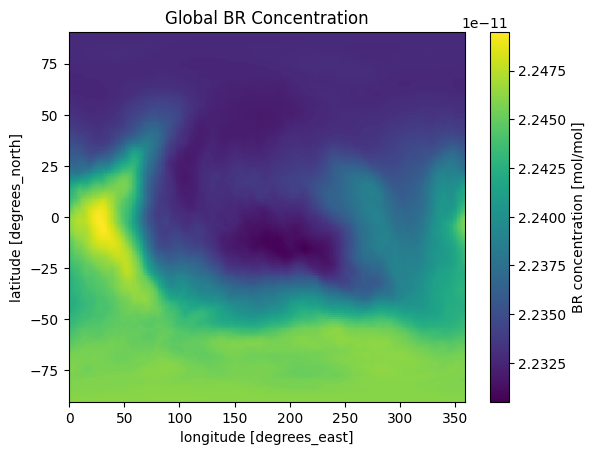

In [70]:
# Use isel (index select) to plot graph using index of coordinates
ds.BR.isel(lev=0, time=0).plot() # plot at first time and pressure level indexes
plt.title("Global BR Concentration") # add title
# To save the plot:
plt.savefig("BR_conc.jpeg") # default img type is png, but can specify by adding .jpeg/pdf/whateverto file name

Text(0.5, 1.0, 'Global Temperatures on 2014-10-01')

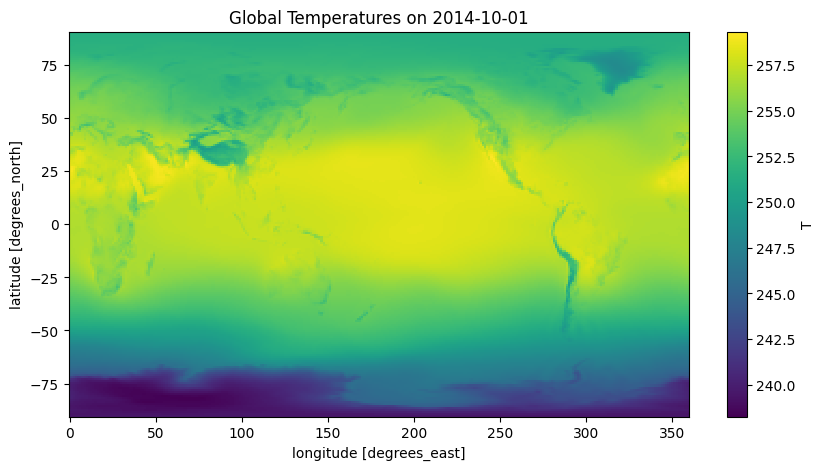

In [8]:
fig = plt.figure(figsize=(10, 5)) # create figure (container) and set size (#pix = size*100)
ax = fig.add_subplot(1, 1, 1) # add a subplot in 1 by 1 grid at pos 1
ds.T.mean(dim='lev').plot(ax=ax) # take average of temperatures at all pressure levels
ax.set_title("Global Temperatures on 2014-10-01")

Text(0.5, 1.0, 'Global Temperatures on 2014-10-01')

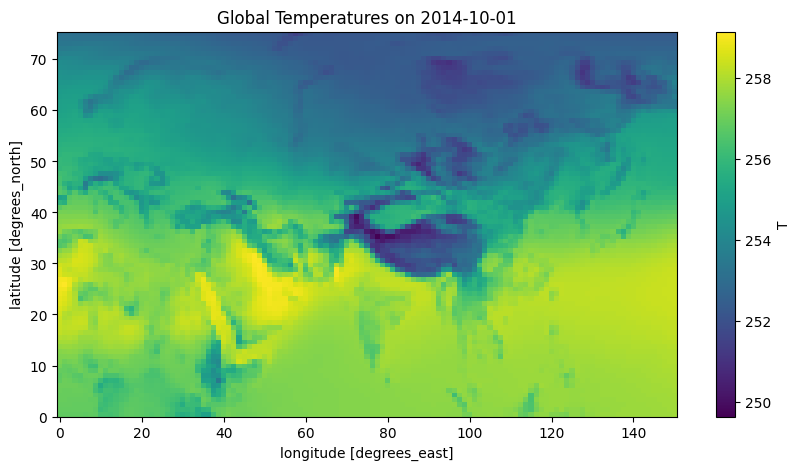

In [68]:
fig, ax = plt.subplots(figsize=(10, 5)) # create figure and an axis (subplot) at same time
ds.T.sel(lon=slice(0,150), lat=slice(0, 75)).mean(dim='lev').plot(ax=ax) # take average of temperatures at all pressure levels
ax.set_title("Global Temperatures on 2014-10-01")

Text(0.5, 1.0, 'CLO concentration')

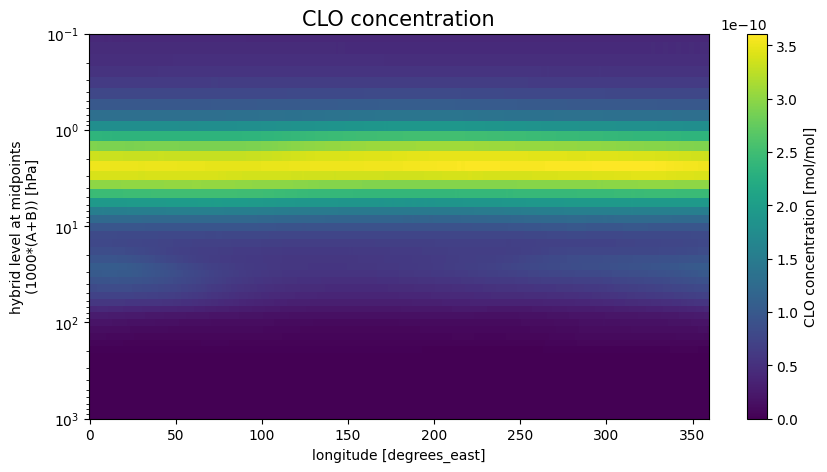

In [67]:
fig,ax = plt.subplots(figsize=[10,5])
cbar_label = ds.CLO.attrs['long_name'] + ' [' + ds.CLO.attrs['units'] + ']'
ds.CLO.isel(time=0).mean(dim='lat').plot(ax=ax, ylim=0.1, cbar_kwargs={'label': cbar_label})
plt.ylim(plt.ylim()[::-1]) # inverting y axis
plt.yscale('log') # using log scale on y axis
ax.set_title("CLO concentration", size=15)

# Contour Plots

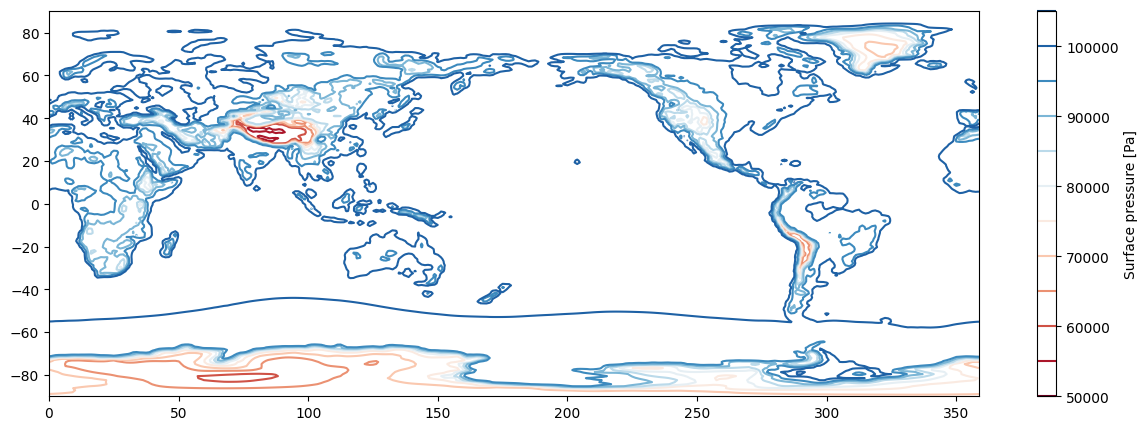

In [39]:
# Contour filled plot
fig=plt.figure(figsize=[15,5])
ax=plt.axes()

cbar_label = ds.PS.attrs['long_name'] + ' [' + ds.PS.attrs['units'] + ']'

cs = ax.contour(ds.lon, ds.lat, ds.PS.isel(time=0), cmap='RdBu', levels=9)
plt.colorbar(cs, label = cbar_label, ax=ax)

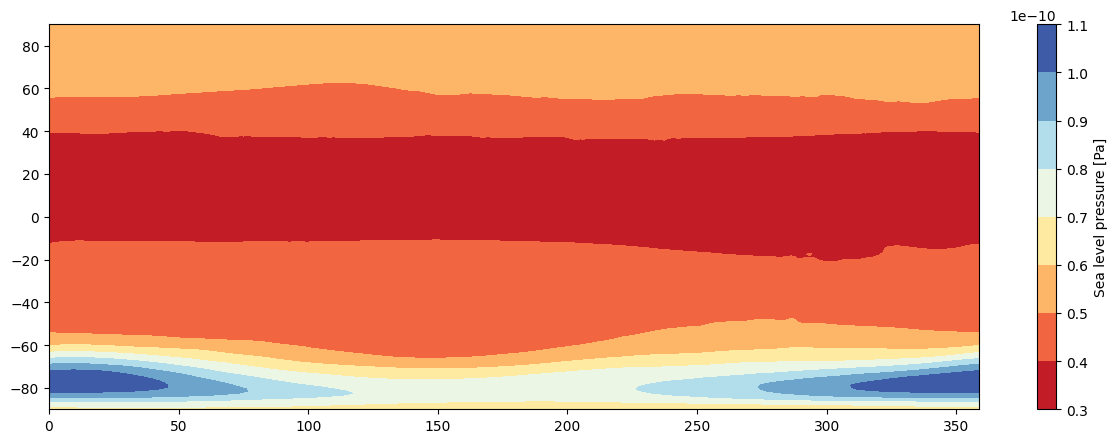

In [40]:
# contour plot
fig=plt.figure(figsize=[15,5])
ax=plt.axes()

cbar_label = ds.PSL.attrs['long_name'] + ' [' + ds.PSL.attrs['units'] + ']'

cs = ax.contourf(ds.lon, ds.lat, ds.CLO.isel(time=0).mean(dim='lev'), cmap='RdYlBu', levels=8)

plt.colorbar(cs, label = cbar_label, ax=ax)

# Subplots

Text(0.5, 1.0, 'Sea-level pressure, 2014-10-01')

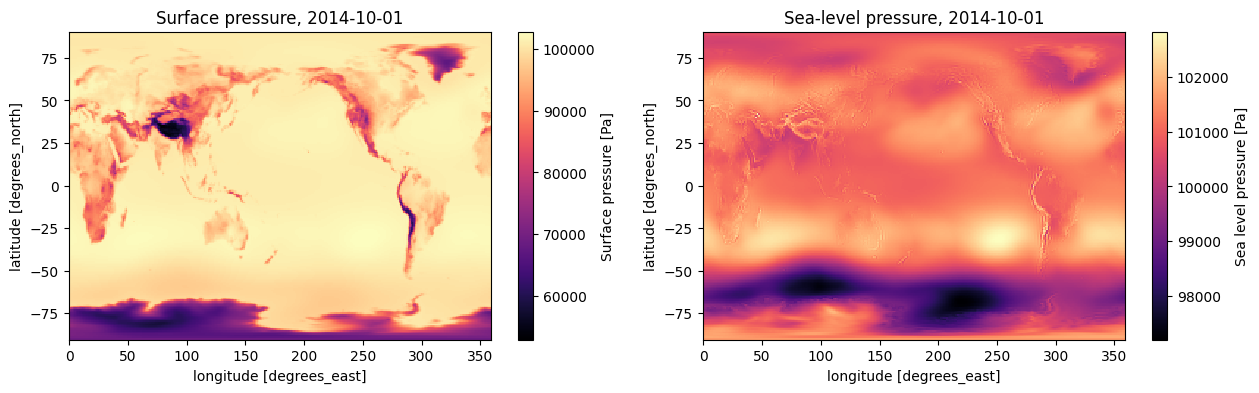

In [20]:
# First example of subplots
fig,(ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=[15,4]) # create container and subcontainers in one line

ds.PS.isel(time=0).plot(ax=ax1, cmap='magma')
ax1.set_title("Surface pressure, 2014-10-01")

ds.PSL.isel(time=0).plot(ax=ax2, cmap='magma')
ax2.set_title("Sea-level pressure, 2014-10-01")

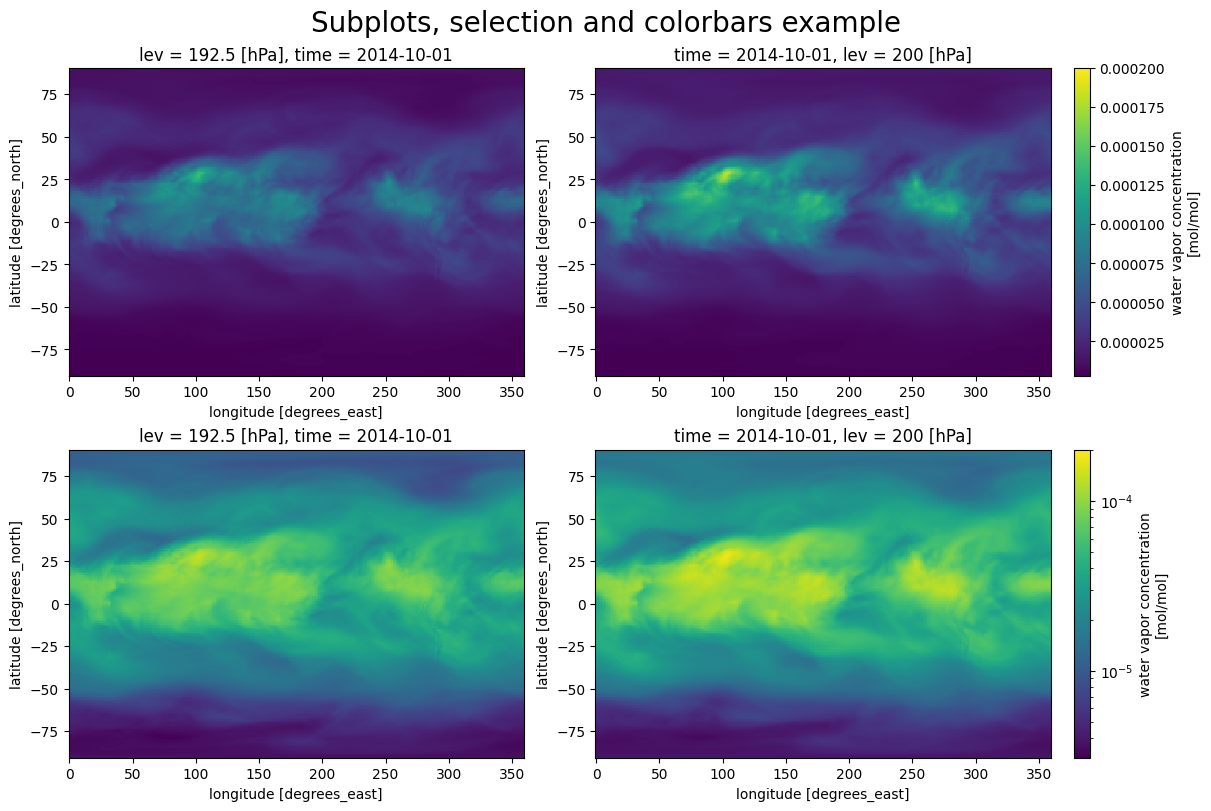

In [65]:
# Second example of subplots
fig,axs = plt.subplots(nrows=2,ncols=2, figsize=[12,8], layout='constrained') # 'constrained' layout prevents overlap of labels
fig.suptitle("Subplots, selection and colorbars example", size=20)

# Normalising colour map between graphs--> can use different types of normalizing
norm = mpl.colors.Normalize(vmax=0.0002)
lognorm = mpl.colors.LogNorm(vmax=0.0002)

# Selection methods
ds.H2O.sel(time='2014-10-30', lev=200, method='nearest').plot(ax=axs[0,0], norm=norm) # sets lev to closest valid value
axs[0,0].collections[-1].colorbar.remove() # remove first colorbar, as second will be identical

ds.H2O.isel(time=0).interp(lev=200).plot(ax=axs[0,1], norm=norm) # interpolation to set lev to 200

# same but uses lognorm on colorbar
ds.H2O.sel(time='2014-10-30', lev=200, method='nearest').plot(ax=axs[1,0], norm=lognorm)
axs[1,0].collections[-1].colorbar.remove() # remove first colorbar, as second will be identical

ds.H2O.isel(time=0).interp(lev=200).plot(ax=axs[1,1], norm=lognorm)


KeyError: 'e'

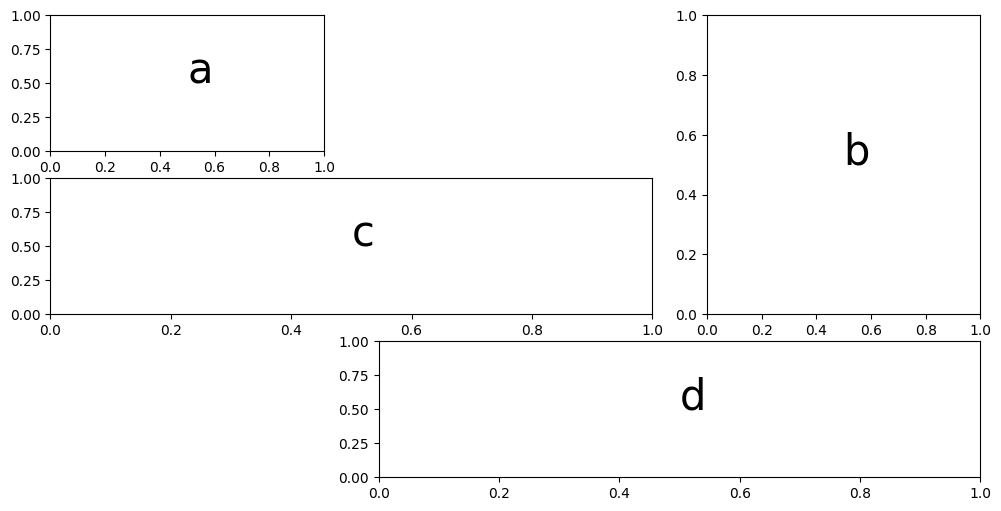

In [224]:
# subplot mosaic: easiest way to make complicated subplot grids
fig = plt.figure(figsize=(12,6))

# mosaic = "ab;cd";
# mosaic = "abd;ccd"
mosaic = "a.b;ccb;.dd"
# mosaic = "abe;cbe;cdd"

axs = fig.subplot_mosaic(mosaic)

axs['a'].annotate('a', xy=[0.5,0.5], size=30)
axs['b'].annotate('b', xy=[0.5,0.5], size=30)
axs['c'].annotate('c', xy=[0.5,0.5], size=30)
axs['d'].annotate('d', xy=[0.5,0.5], size=30)
axs['e'].annotate('e', xy=[0.5,0.5], size=30)

<Axes: >

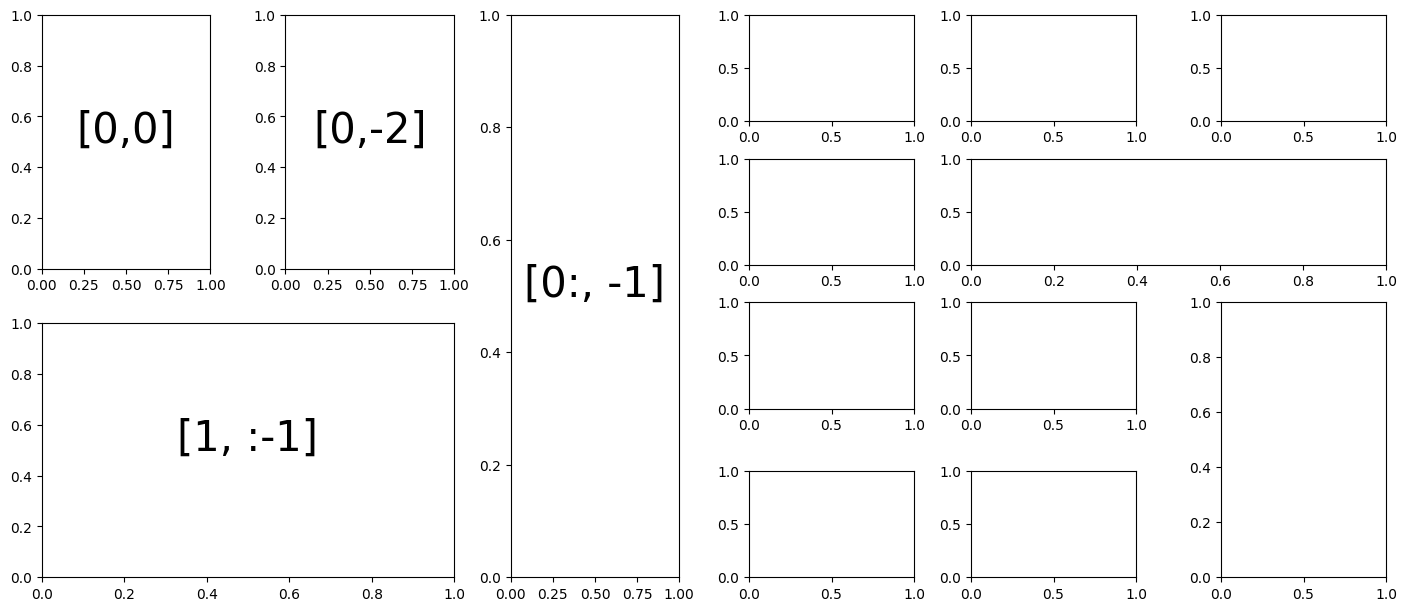

In [223]:
# subfigures
fig = plt.figure(figsize=(14,6), layout="constrained")
left,right = fig.subfigures(nrows=1,ncols=2)

# Gridspec: use for more complex subplots

# use gridspec to create larger plots
grid = left.add_gridspec(ncols=3, nrows=2, figure=left)
ax1 = left.add_subplot(grid[0,0]).annotate("[0,0]", xy=[0.5,0.5], size=30, ha='center')
ax2 = left.add_subplot(grid[0,-2]).annotate("[0,-2]", xy=[0.5,0.5], size=30, ha='center')
ax3 = left.add_subplot(grid[1, :-1]).annotate("[1, :-1]", xy=[0.5,0.5], size=30, ha='center')
ax4 = left.add_subplot(grid[0:, -1]).annotate("[0:, -1]", xy=[0.5,0.5], size=30, ha='center')


# use subplots as a base, then remove some and use gridspec to create larger ones
axs = right.subplots(4,3)
grid = axs[-2,-1].get_gridspec()
for ax in axs[1, 1:]:
    ax.remove()
right.add_subplot(grid[1, 1:])
for ax in axs[-2:, -1]:
    ax.remove()
right.add_subplot(grid[-2:,-1])

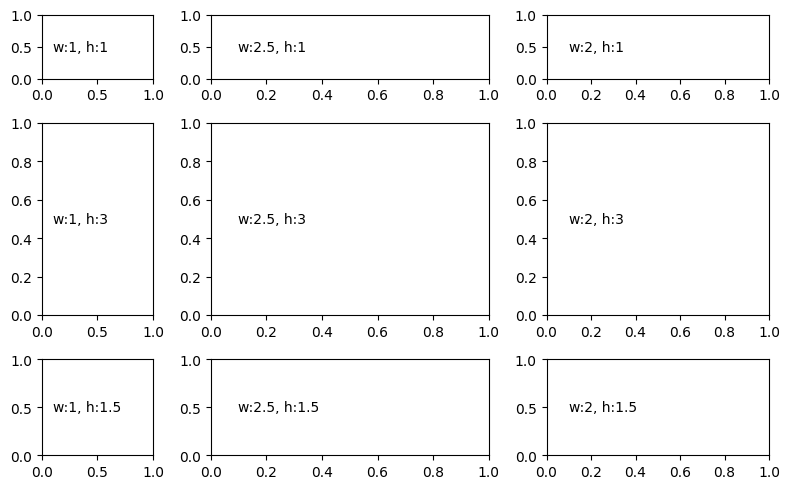

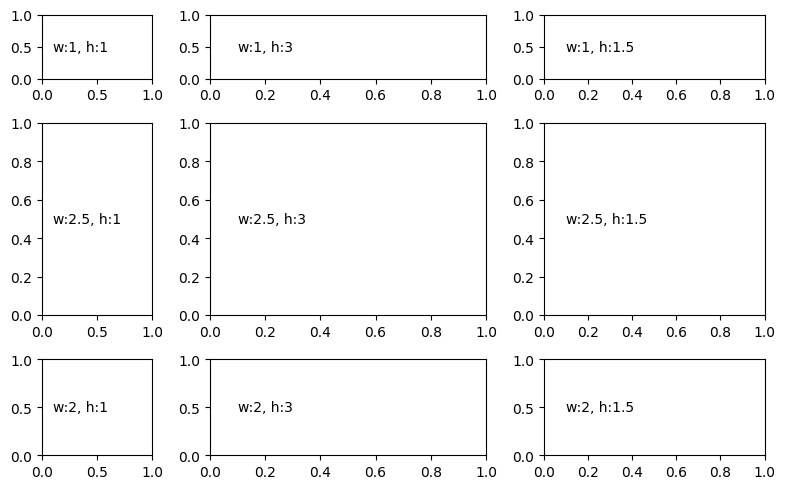

In [25]:
# More gridspec examples
fig = plt.figure(figsize=(8,5), layout="tight")
w=[1, 2.5, 2]
h=[1, 3, 1.5]
grid = fig.add_gridspec(ncols=3, nrows=3, width_ratios=w, height_ratios=h)
ax1 = fig.add_subplot(grid[0,0]).annotate("w:1, h:1", (0.1, 0.5), xycoords="axes fraction", va="center")
ax2 = fig.add_subplot(grid[0,1]).annotate("w:2.5, h:1", (0.1, 0.5), xycoords="axes fraction", va="center")
ax3 = fig.add_subplot(grid[0,2]).annotate("w:2, h:1", (0.1, 0.5), xycoords="axes fraction", va="center")

ax4 = fig.add_subplot(grid[1,0]).annotate("w:1, h:3", (0.1, 0.5), xycoords="axes fraction", va="center")
ax5 = fig.add_subplot(grid[1,1]).annotate("w:2.5, h:3", (0.1, 0.5), xycoords="axes fraction", va="center")
ax6 = fig.add_subplot(grid[1,2]).annotate("w:2, h:3", (0.1, 0.5), xycoords="axes fraction", va="center")

ax7 = fig.add_subplot(grid[2,0]).annotate("w:1, h:1.5", (0.1, 0.5), xycoords="axes fraction", va="center")
ax8 = fig.add_subplot(grid[2,1]).annotate("w:2.5, h:1.5", (0.1, 0.5), xycoords="axes fraction", va="center")
ax9 = fig.add_subplot(grid[2,2]).annotate("w:2, h:1.5", (0.1, 0.5), xycoords="axes fraction", va="center")


# same layout as above, but simpler code
w=[1, 2.5, 2]
h=[1, 3, 1.5]
fig, axs = plt.subplots(3,3, gridspec_kw = dict(width_ratios=w, height_ratios=h), figsize=(8,5))

for r, row in enumerate(axs):
    for c, ax in enumerate(row):
        ax.annotate("w:%s, h:%s" %(w[r], h[c]), (0.1, 0.5), xycoords="axes fraction", va="center")


fig.tight_layout()

# Other Types of Plots

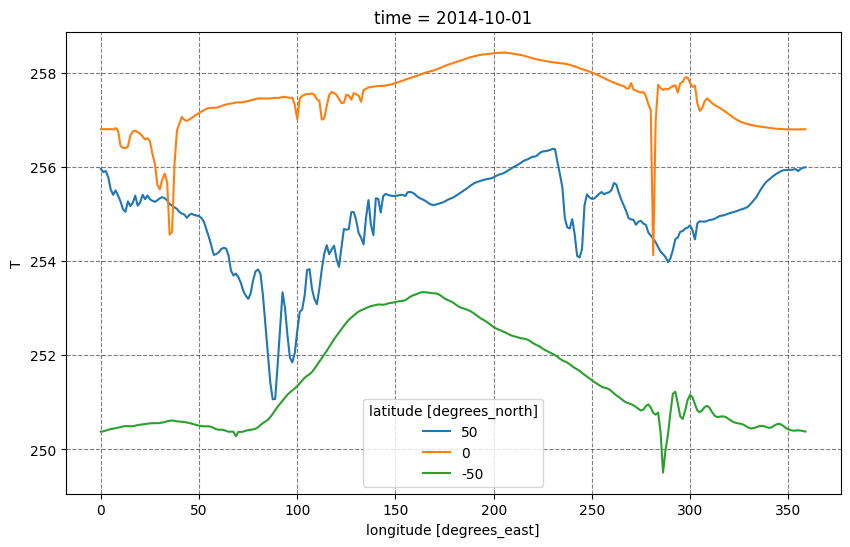

In [43]:
fig,ax = plt.subplots(figsize=[10,6])
       # taking average of levels, interpolating for latitude
ds.T.isel(time=0).mean(dim='lev').interp(lat=[50,0,-50]).plot(hue='lat', ax=ax, label=[50,0,-50])
ax.grid(c='k', ls='--', alpha=0.5)

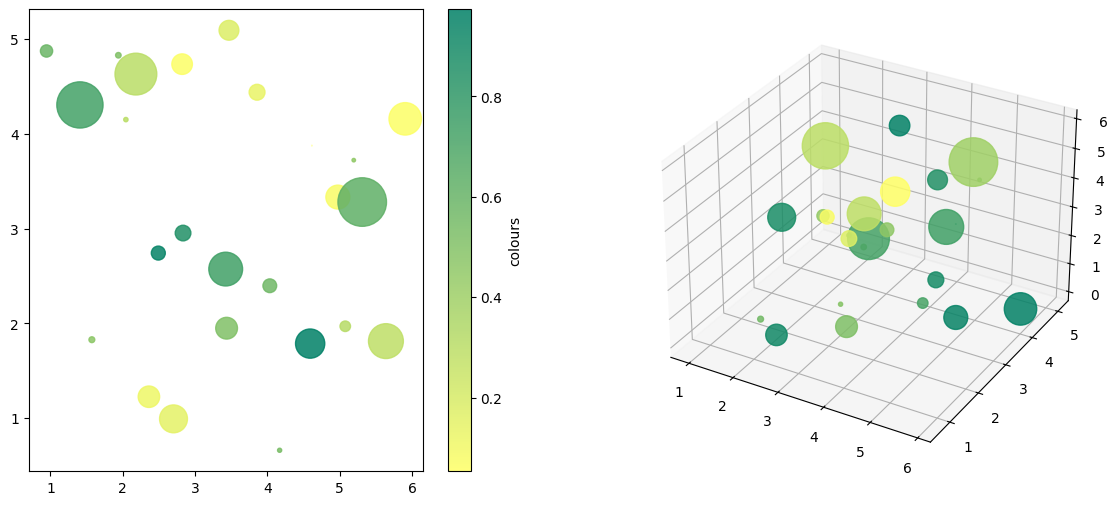

In [59]:
fig = plt.figure(figsize=[14,6])

# setting up test data
rng = np.random.default_rng()
N_points = 25

x = rng.random(N_points) * 6
y = rng.random(N_points) * 5 + 0.5
z = rng.random(N_points) * 6
area = 1.5*(30 * np.random.rand(N_points))**2  # 
c = rng.random(N_points)

# creating left plot (2D scatter)
ax_2D = fig.add_subplot(1,2,1)
left = ax_2D.scatter(x, y, s=area, c=c, alpha=0.85, cmap='summer_r') # adding '_r' to any colormap will reverse it

#creating right plot (3D scatter)
ax_3D = fig.add_subplot(1,2,2, projection='3d')
right = ax_3D.scatter(x, y, z, s=area, c=c, cmap='summer', alpha=0.85)

plt.colorbar(left, label='colours', ax=ax_2D)

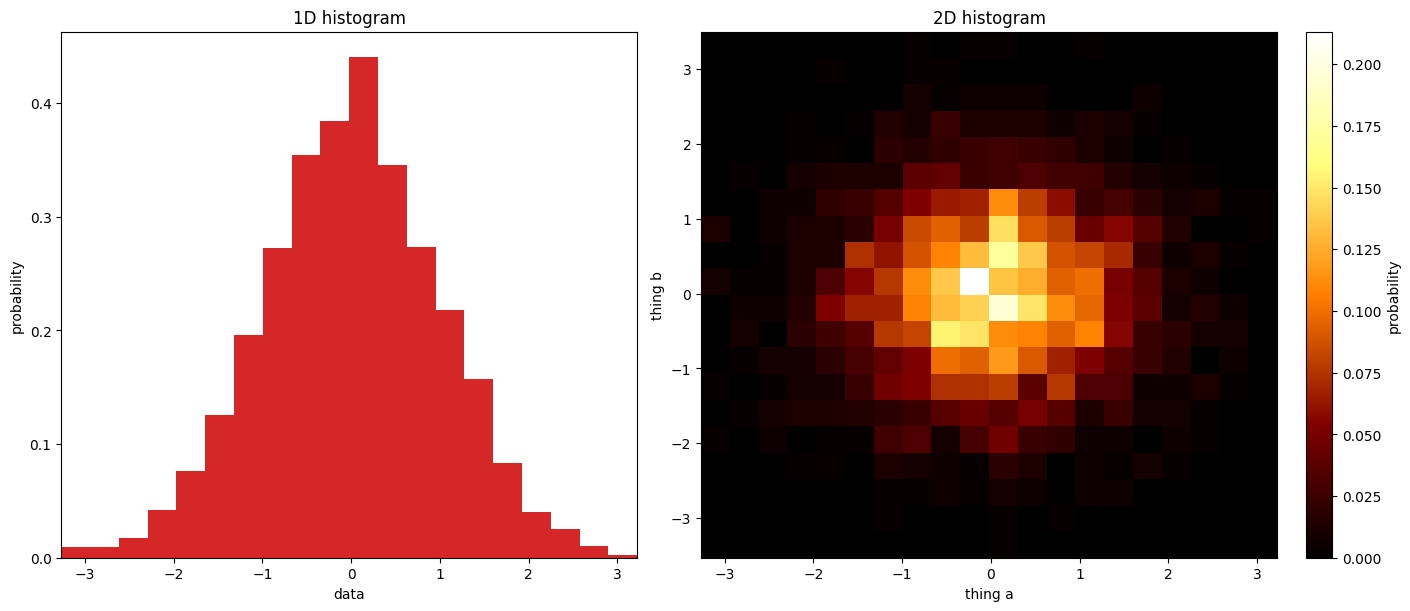

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6), layout='constrained', sharex=True)

# setting up data
npts = 3000; nbins = 20; 
x = np.random.normal(size=npts)
y = np.random.normal(size=npts)

# 1d histogram
ax1.hist(x, bins=nbins, density=True, color='tab:red')
ax1.set_title("1D histogram")
ax1.set_xlabel("data")
ax1.set_ylabel("probability")

# 2d histogram
two_d = ax2.hist2d(x, y, bins=nbins, density=True, cmap='afmhot')
ax2.set_title("2D histogram")
ax2.set_xlabel("thing a")
ax2.set_ylabel("thing b")
cb = fig.colorbar(two_d[3], ax=ax2, location='right', label="probability")

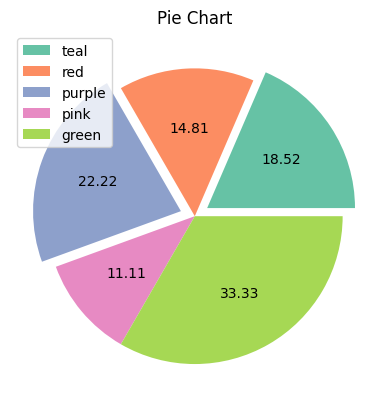

In [63]:
parts = [0.5,0.4,0.6,0.3,0.9]
colors=plt.cm.Set2.colors
labels = ['teal', 'red', 'purple', 'pink', 'green']
plt.pie(parts, colors=colors, labels=labels, labeldistance=None, explode=[0.1,0,0.1,0,0], autopct='%.2f')
plt.title("Pie Chart")
plt.legend(loc='upper left')

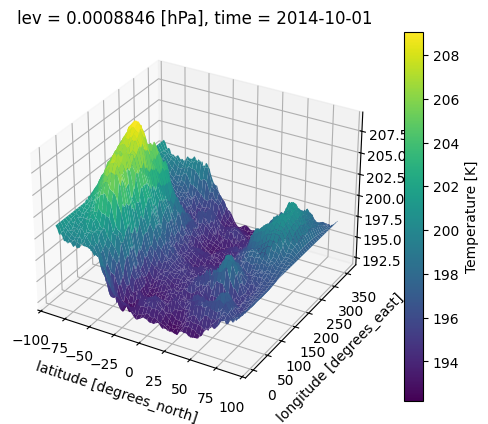

In [15]:
Temp =ds.T.isel(time=0, lev=10)
Temp.T.plot.surface(cmap='viridis')

# Further Customisation

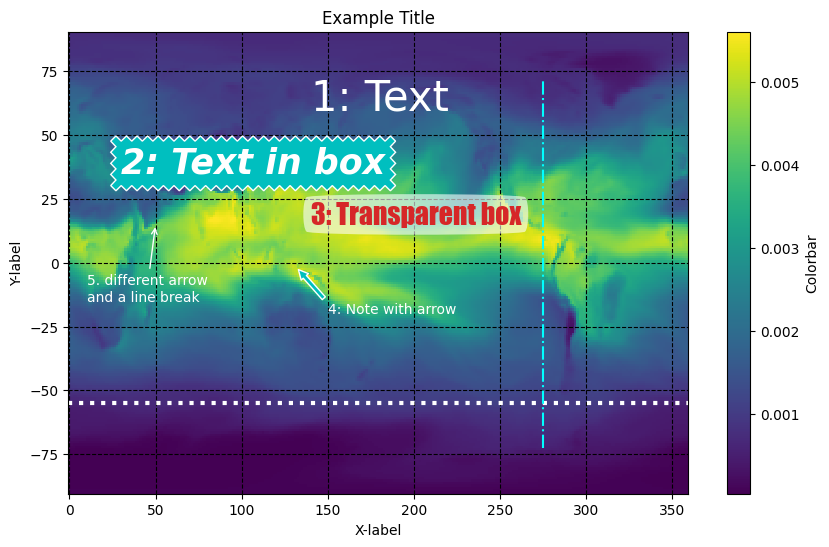

In [65]:
# Customising labels and annotating
fig, ax = plt.subplots(1,1, figsize=[10,6])
ds.H2O.isel(time=0).mean(dim='lev').plot(ax=ax)
ax.set(title="Example Title", ylabel="Y-label", xlabel="X-label")
ax.collections[-1].colorbar.set_label("Colorbar")

# 1. text
plt.text(x=140, y=60, s="1: Text", color='white', size=30)
# 2. text in box
plt.text(x=30, y=35, s="2: Text in box", color='w', weight='demi', style='italic', size=25, 
        bbox=dict(facecolor='c', edgecolor='w', boxstyle='sawtooth'))
# 3. transparent box
plt.text(x=140, y=15, s="3: Transparent box", size=20, font='fantasy', c='tab:red', 
        bbox=dict(fc='w', ec='none', alpha=0.6, boxstyle='round4')) # alpha controls transparency
# 4. note with arrow
ax.annotate("4: Note with arrow", xy=(132,-2), xytext=(150,-20), c='w', # xy=point of arrow, if xy=xytext, arrow disappears
            arrowprops=dict(fc='c', ec='w', shrink=0.05, width=3, headwidth=7, headlength=7))
# 5. different arrow style
ax.annotate("5. different arrow\nand a line break", xy=(50, 15), xytext=(10,-15), c='w', 
           arrowprops=dict(arrowstyle='->', color='w'))

# lines
ax.axhline(y=-55, c='w', linestyle=':', linewidth='3') #horizontal line, white, dotted line style
ax.axvline(x=275, ymin=0.1, ymax=0.9, c='cyan',ls='-.') #vertical line, starts at 10%, ends at 90%, cyan dot dash style
ax.grid(True, c='k', ls='--')

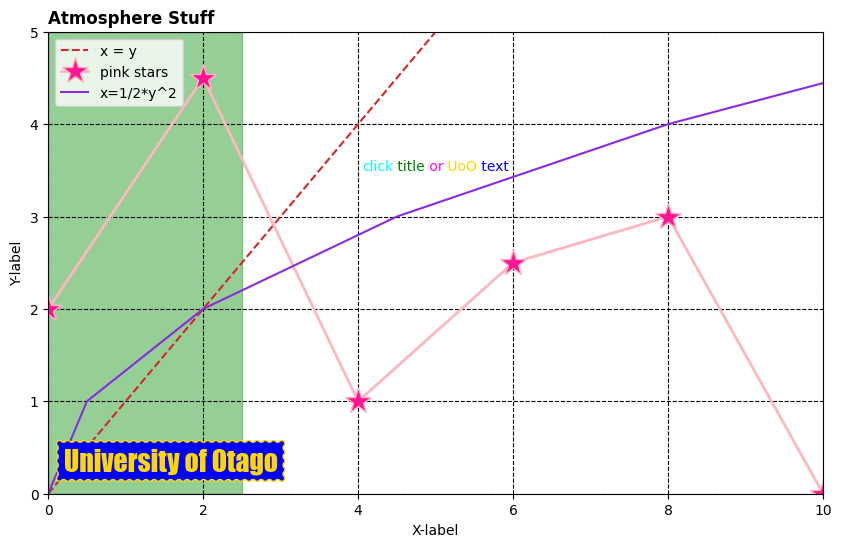

In [6]:
# Customising labels and annotating
fig, ax = plt.subplots(1,1, figsize=(10,6))

title = ax.set_title("Atmosphere Stuff", weight='bold', loc='left')
title.set_url("https://www.physics.otago.ac.nz/research/atmosphere/index.html")

ax.set(ylabel="Y-label", ylim=(0,5), xlabel="X-label", xlim=(0, 10) )
ax.grid(True, c='k', ls='--')

ax.axline([0,0], slope=1, color='tab:red', ls='--', label='x = y')

x = np.arange(0,11,2)
y = [2, 4.5, 1, 2.5, 3, 0]
ax.plot(x,y, '-*', lw=2, ms=20, mfc='deeppink', c='lightpink', label='pink stars')

y = np.arange(6)
x= 0.5*(y**2)
ax.plot(x,y, c='blueviolet', label="x=1/2*y^2")

ax.legend(loc='upper left')

rect = plt.Rectangle(xy=[0,0], width=2.5, height=5, alpha=0.5, color='tab:green')
ax.add_patch(rect)

t = ax.text(4.05, 3.5, "click", c='cyan')
t = ax.annotate(" title", xycoords=t, xy=[1,0], verticalalignment='bottom', c='green')
t = ax.annotate(" or", xycoords=t, xy=[1,0], va='bottom', c='magenta')
t = ax.annotate(" UoO", xycoords=t, xy=[1,0], va='bottom', c='gold')
t = ax.annotate(" text", xycoords=t, xy=[1,0], va='bottom', c='blue')

link = plt.text(x=0.02, y=0.05, s="University of Otago", transform=ax.transAxes, 
        color='gold', weight='bold', font='fantasy', size=20, 
        bbox=dict(fc='blue', ec='gold', boxstyle='roundtooth'))
link.set_url("https://www.otago.ac.nz/")
fig.savefig("test.svg") #links in images only work in svg format

# Using cartopy

IMPORTANT: if there is a download error when using cartopy features, go to https://www.naturalearthdata.com/downloads/ or urls specified in error and download required files. Extract all files in /.local/share/cartopy/shapefiles/natural_earth/ and then physical or cultural depending on the feature.

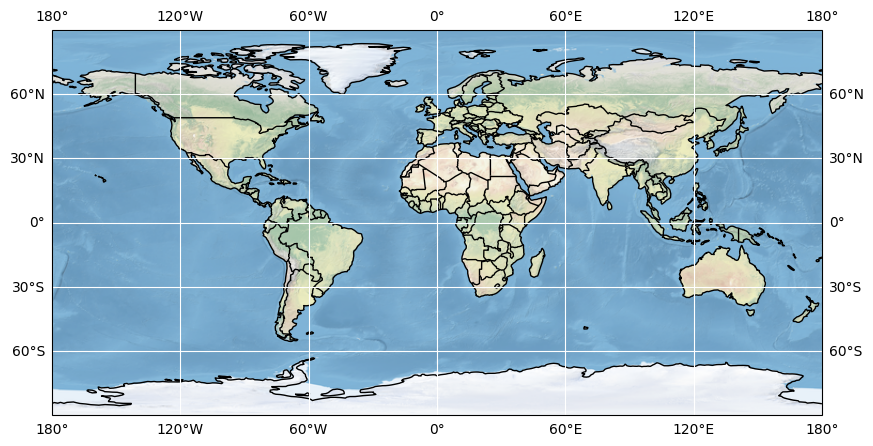

In [49]:
fig=plt.figure(figsize=(10,5))
ax=plt.axes(projection=ccrs.PlateCarree()) # projection wanted
ax.stock_img()
ax.gridlines(color='w', draw_labels=True) # grid, with longitude/latitude axes labelled
ax.coastlines(color='k') #outline of land
ax.add_feature(cfeature.BORDERS) # divide land into countries

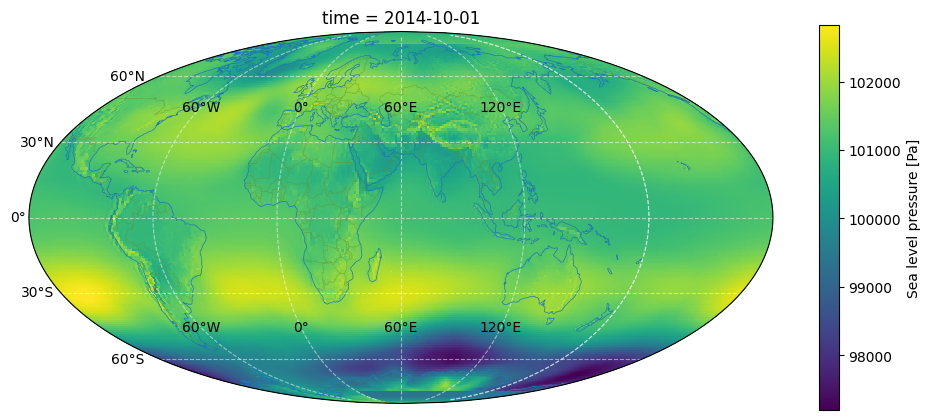

In [50]:
fig = plt.figure(figsize=(12,5))
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=60)) # projection wanted, specified central longitude
ax.coastlines(resolution='110m', color='tab:blue', lw=0.5)
ax.add_feature(cfeature.BORDERS, lw=0.5, ec='olivedrab', alpha=0.5);
ax.gridlines(ls='--', color='w', draw_labels=True, alpha=0.5)
ds.PSL.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree()) # projection coords are in (always PlateCarree if in lat/longitude)
plt.show()

Text(0.5, 1.0, 'Concentration of total nitrogen around world')

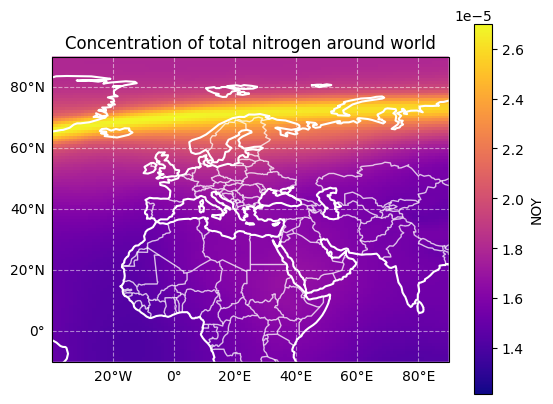

In [58]:
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=True, color='w', ls='--', alpha=0.5)
gl.top_labels = False # remove grid labels at top
gl.right_labels = False # and to right of plot

ax.coastlines(resolution='110m', color='w', lw=1.5) # add country outlines
ax.add_feature(cfeature.BORDERS, ec='w', alpha=0.75) #add borders

ax.set_extent([-40,90, -10, 95], crs=ccrs.PlateCarree()) # display smaller area

ds.NOY.isel(time=0).mean(dim='lev').plot(cmap='plasma', ax=ax, transform=ccrs.PlateCarree()) #plot graph

ax.set_title("Concentration of total nitrogen around world")

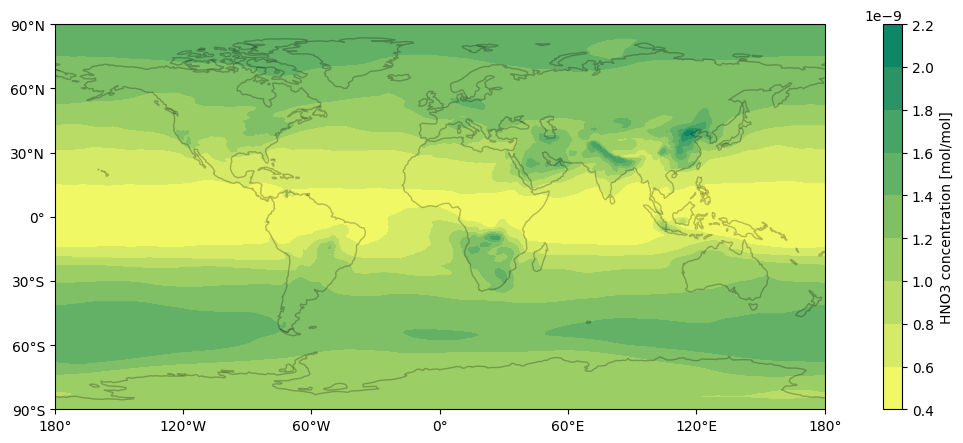

In [52]:
fig=plt.figure(figsize=[15,5])
ax=plt.axes(projection=ccrs.PlateCarree())

data, lons = add_cyclic_point(ds.HNO3.isel(time=0).mean(dim='lev'), coord=ds.lon) #else would be a white line in middle
cbar_label = ds.HNO3.attrs['long_name'] + ' [' + ds.HNO3.attrs['units'] + ']'

cs = ax.contourf(lons, ds.lat, data, transform=ccrs.PlateCarree(), cmap='summer_r', levels=10)#, extend='both')
plt.colorbar(cs, label = cbar_label)
ax.coastlines(color='k', alpha=0.25)

ax.set_xticks([-180,-120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())

ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())

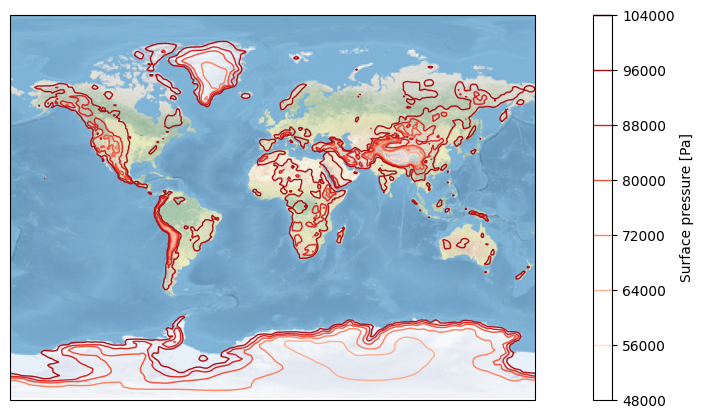

In [53]:
# Contour filled plot
fig=plt.figure(figsize=[15,5])
ax=plt.axes(projection=ccrs.Miller())

data, lons = add_cyclic_point(ds.PS.isel(time=0), coord=ds.lon) #else would be a white line in middle
cbar_label = ds.PS.attrs['long_name'] + ' [' + ds.PS.attrs['units'] + ']'
ax.stock_img()
cs = ax.contour(lons, ds.lat, data, cmap='Reds', levels=7, transform=ccrs.PlateCarree(), linewidths=1)
plt.colorbar(cs, label = cbar_label, ax=ax)

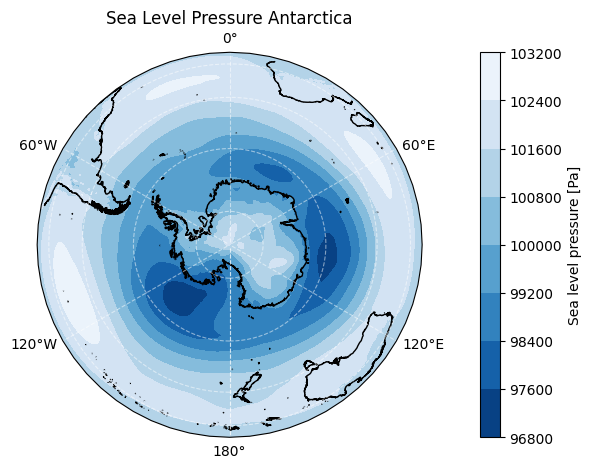

In [8]:
fig=plt.figure(figsize=[15,5])
ax=plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=-90))

data = ds.PSL.isel(time=0)
cbar_label = ds.PSL.attrs['long_name'] + ' [' + ds.PSL.attrs['units'] + ']'

# contour coloured map
data, lons = add_cyclic_point(data, coord=ds.lon) #else would be a white line in middle
cs = ax.contourf(lons, ds.lat, data, transform=ccrs.PlateCarree(), cmap='Blues_r')
plt.colorbar(cs, label = cbar_label)

# # normal coloured plot
# cs = data.plot(transform=ccrs.PlateCarree(), cmap='Blues_r')

# ax.set_extent([0,360, -90,-40], ccrs.PlateCarree()) #uncomment to zoom in on antarctica

ax.set_title("Sea Level Pressure Antarctica")
ax.coastlines(color='k', resolution='10m')
grid = ax.gridlines(ls='--', color='w', alpha=0.5, draw_labels=True)

Go to https://scitools.org.uk/cartopy/docs/latest/reference/projections.html for full list of map projections

Times taken to load simple map with coastlines and gridlines in each projection (times taken using %%timeit)
* Circular projections:
* Orthographic= 87.5 ms ± 3.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
* NearsidePerspective= 96.5 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
* Geostationary= 104 ms ± 4.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
*
* Square/Rectangle projections:
* PlateCarree= 418 ms ± 4.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) --> basic lat/lon
* Mercator= 1.12 s ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* Miller= 1.51 s ± 64.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* LambertCylindrical= 1.31 s ± 38.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* 
* Oval
* Mollweide= 2.85 s ± 29.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
* Robinson= 4.22 s ± 136 ms per loop (mean ± std. dev. of 7 runs, 1 loop each
* EqualEarth = 9.03 s ± 4.13 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

# Animating Plots

CPU times: total: 15.4 s
Wall time: 18.9 s


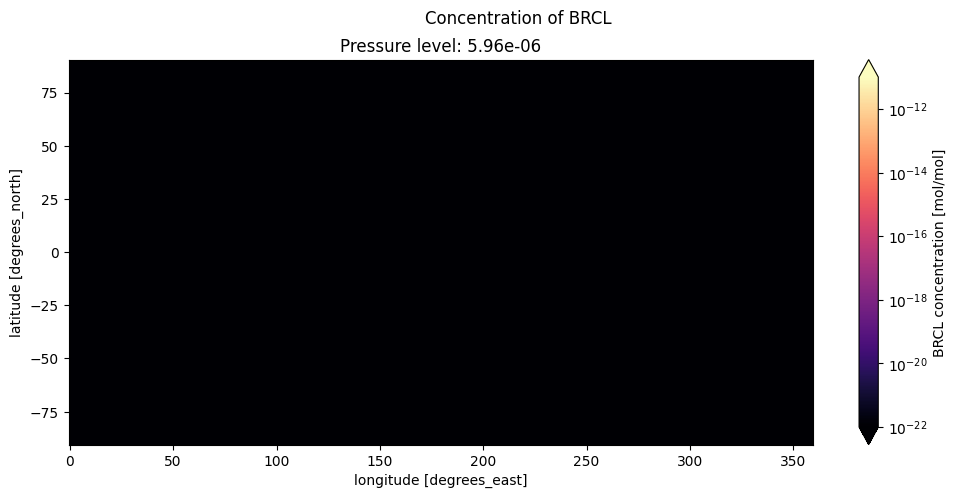

In [5]:
%%time

# Good animation without coastlines

fig,ax = plt.subplots(figsize=(12,5))
fig.suptitle("Concentration of BRCL", ha='center')

norm = mpl.colors.LogNorm(vmin=10**-22, vmax=10**-11) # the range of colorbar--> figure out through looking at data
ds.BRCL.isel(lev=0,time=0).plot(ax=ax, cmap='magma', norm=norm, extend='both') # plot initial figure to obtain colorbar from

def animate(num): # function to update each frame
    ax.clear() # clear previous plots
    ds.BRCL.isel(lev=num,time=0).plot(ax=ax, cmap='magma', norm=norm, extend='both') # draw new plot
    ax.collections[-1].colorbar.remove() # Removing colorbars of plots so don't multiply
    ax.set_title("Pressure level: %.4g" %ds.lev.isel(lev=num)['lev'].values)

anim = FuncAnimation(fig, animate, frames=ds.BRCL.lev.size, interval=200) # frames = number frames to draw, interval = speed of anim

anim.save("brcl_norm.gif", writer='pillow'); # save animation to same folder as jupyter file

# 18.8 s ± 717 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

CPU times: total: 20.7 s
Wall time: 23.3 s


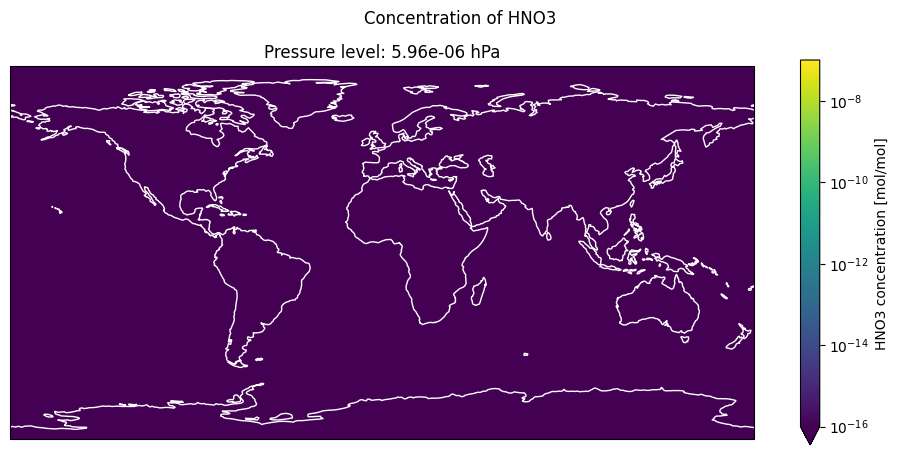

In [9]:
%%time
# contourf animation with cartopy coastlines

fig = plt.figure(figsize=(12,5))
ax=plt.axes(projection=ccrs.PlateCarree())

fig.suptitle("Concentration of HNO3", ha='center')

norm = mpl.colors.LogNorm(vmin=10**-16, vmax=10**-7) # normalise so frames share same range of colors -> figure range through testing
ds.HNO3.isel(lev=0,time=0).plot(ax=ax, norm=norm, transform=ccrs.PlateCarree()) # initial plot, creates colorbar

def animate(num): # animation func updates for each frame
    ax.clear() # clear previous frame
    data, lons = add_cyclic_point(ds.HNO3.isel(time=0, lev=num), coord=ds.lon) # tells map that longitude is cyclic--> stops white bar appearing
    cs = ax.contourf(lons, ds.lat, data, norm=norm, levels=10, transform=ccrs.PlateCarree()) # draw plot
    ax.coastlines(color='w') # draw coastlines
    ax.set_title("Pressure level: %.4g hPa" %ds.lev.isel(lev=num)['lev'].values) # title frame with current pressure level


anim = FuncAnimation(fig, animate, frames=ds.HNO3.lev.size, interval=200, repeat=True) # frames= number frames in anim, interval = frame per time

anim.save("HNO3_cartopy.gif", writer='pillow'); # save animation to same folder as jupyter file

# 21.6 s ± 318 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Links
* https://foundations.projectpythia.org
* https://matplotlib.org/stable/users/index.html
* https://matplotlib.org/stable/gallery/index.html
* https://matplotlib.org/stable/gallery/color/named_colors.html
* https://matplotlib.org/stable/users/explain/colors/colormaps.html
* https://matplotlib.org/3.5.0/tutorials/
* https://docs.xarray.dev/en/stable/user-guide/plotting.html
* https://metos-uio.github.io/GEO4962/04-Simple_plot/index.html
* https://www.naturalearthdata.com/downloads/
* https://scitools.org.uk/cartopy/docs/latest/reference/projections.html
* https://scitools.org.uk/cartopy/docs/v0.15/gallery.html
* https://scitools.org.uk/cartopy/docs/latest/reference/index.html
* https://kpegion.github.io/Pangeo-at-AOES/index.html

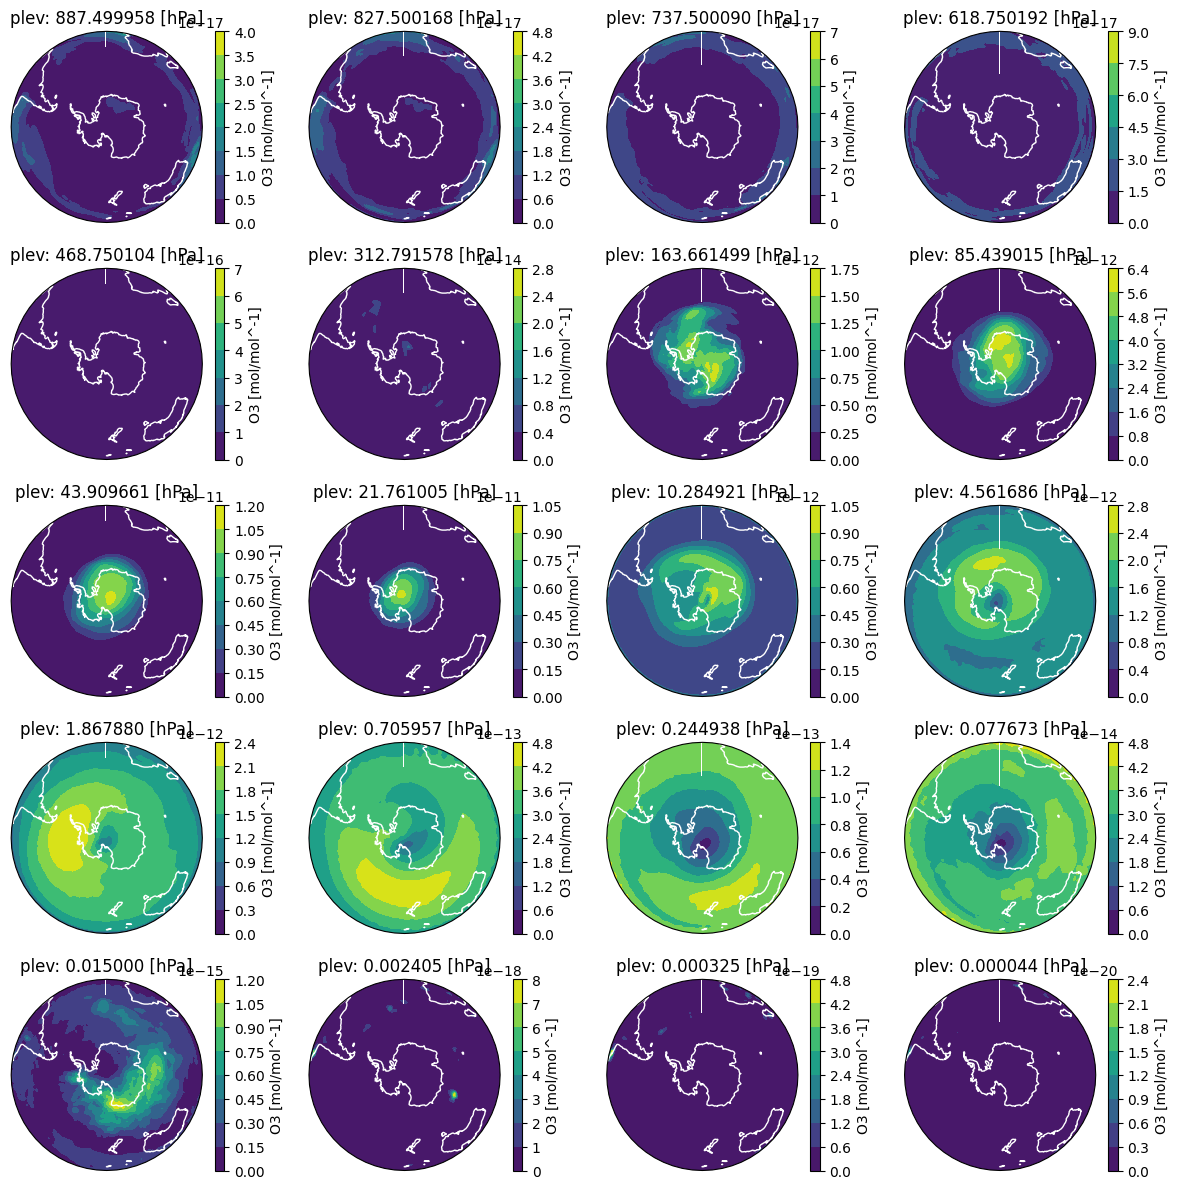

In [7]:
# at time = n, all plev (contour plot)
fig, axs = plt.subplots(5,4, figsize=(12,12), subplot_kw={'projection': ccrs.Orthographic(central_longitude=0.0, central_latitude=-90)})
nTime = 2
lev=80
for r, row in enumerate(axs):
    for c, ax in enumerate(row):
        # data, lons = add_cyclic_point(ds.BRCL.isel(time=0, lev=lev), coord=ds.lon) #else would be a white line in middle
        cs = ax.contourf(ds.lon, ds.lat, ds.BRCL.isel(time=0, lev=lev), transform=ccrs.PlateCarree())
        plt.colorbar(cs, label = 'O3 [mol/mol^-1]')
        # ds.BRCL.isel(time=0, lev=lev).plot(ax=ax, transform=ccrs.PlateCarree())
        ax.set_title("plev: %f [hPa]" %ds.lev.isel(lev=lev)['lev'].values)
        ax.coastlines(resolution='110m', color='w')
        lev-=4


fig.tight_layout()